In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [22]:
# read csv file
df = pd.read_csv("Resources/Cleaned 2021.1.csv")
df

,Column1,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,END_DATE_TIME,DAMAGE_PROPERTY,DAMAGE_CROPS,...,BEGIN_LOCATION,END_RANGE,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,98,158048,955718,INDIANA,2021,June,Flash Flood,6/19/21 8:00,100.00K,0.00K,...,AURORA,2.0,AURORA,39.0700,-84.9000,39.0377,-84.8949,Thunderstorms developed during the afternoon a...,Numerous reports of high water and flash flood...,CSV
1,154,160141,967887,MISSISSIPPI,2021,August,Flash Flood,8/19/21 17:15,4.00K,0.00K,...,MC CRARY,1.0,NEW HOPE,33.4700,-88.3000,33.4700,-88.3299,Afternoon showers and thunderstorms developed ...,"Flash flooding occurred on Beersheba Road, Wid...",CSV
2,168,163574,987610,GEORGIA,2021,September,Flash Flood,9/20/21 16:00,30.00K,0.00K,...,EASTMAN,3.0,AMOSKEAG,32.1455,-83.2398,32.1432,-83.1975,"Amidst a prolonged wet and soggy period, anoth...",The Emergency Manager relayed multiple reports...,CSV
3,241,163574,987613,GEORGIA,2021,September,Flash Flood,9/20/21 23:30,30.00K,0.00K,...,HEBRON,3.0,HEBRON,32.9400,-82.9800,32.9560,-82.9554,"Amidst a prolonged wet and soggy period, anoth...",The Emergency Manager reported a portion of Pa...,CSV
4,267,158048,955715,INDIANA,2021,June,Flash Flood,6/19/21 6:30,5.00K,0.00K,...,BATESVILLE,1.0,BATESVILLE,39.3000,-85.2200,39.2862,-85.2288,Thunderstorms developed during the afternoon a...,Numerous roads were closed around Batesville. ...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,58761,165374,999645,TEXAS,2021,December,Wildfire,12/10/21 23:00,10.00K,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong storm system with a tight pressure gr...,"Named the Arrowhead fire, this fire burned rou...",CSV
2868,58762,165374,999646,TEXAS,2021,December,Wildfire,12/10/21 23:00,100.00K,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong storm system with a tight pressure gr...,"Named the Electra Complex fire, this fire burn...",CSV
2869,59186,164367,998807,KANSAS,2021,December,Wildfire,12/15/21 23:59,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A very strong cold front approached the area f...,"Several large wildfires burned 7,400 acres. S...",CSV
2870,59400,164367,998808,KANSAS,2021,December,Wildfire,12/15/21 23:59,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A very strong cold front approached the area f...,"Several large wildfires burned 1,126 acres. S...",CSV


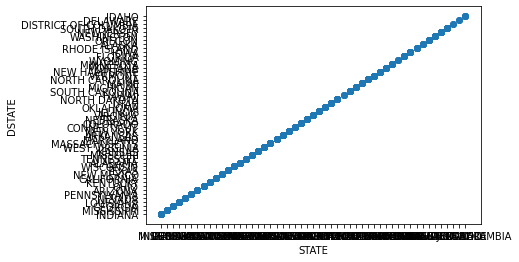

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [40]:
plt.scatter(df.STATE, df.STATE)
plt.xlabel('STATE')
plt.ylabel('DSTATE')
plt.show()
plt.figure(figsize=(15,15))

In [41]:
X = df.STATE.values.reshape(-1, 1)

In [42]:
#Rows x Columns
df.shape

(2872, 23)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column1            2872 non-null   int64  
 1   EPISODE_ID         2872 non-null   int64  
 2   EVENT_ID           2872 non-null   int64  
 3   STATE              2872 non-null   object 
 4   YEAR               2872 non-null   int64  
 5   MONTH_NAME         2872 non-null   object 
 6   EVENT_TYPE         2872 non-null   object 
 7   END_DATE_TIME      2872 non-null   object 
 8   DAMAGE_PROPERTY    2526 non-null   object 
 9   DAMAGE_CROPS       2544 non-null   object 
 10  SOURCE             2872 non-null   object 
 11  FLOOD_CAUSE        1745 non-null   object 
 12  BEGIN_AZIMUTH      2718 non-null   object 
 13  BEGIN_LOCATION     2718 non-null   object 
 14  END_RANGE          2718 non-null   float64
 15  END_LOCATION       2718 non-null   object 
 16  BEGIN_LAT          2718 

In [44]:
X[:5]

array([['INDIANA'],
       ['MISSISSIPPI'],
       ['GEORGIA'],
       ['GEORGIA'],
       ['INDIANA']], dtype=object)

In [47]:
X.shape

(2872, 1)

In [48]:
y = df.DAMAGE_PROPERTY

In [49]:
#Checking for duplicate rows

duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 23)


In [46]:
#provide the count, mean, standard deviation, minimum and maximum values and the quantities of the data.
df.describe()

,Column1,EPISODE_ID,EVENT_ID,YEAR,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,2872.000000,2872.000000,2.872000e+03,2872.0,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000
mean,36253.492340,160675.423747,9.718025e+05,2021.0,2.570272,37.539022,-89.776471,37.545624,-89.756069
std,15575.529187,2649.131108,1.574219e+04,0.0,5.269690,4.498889,12.360198,4.498432,12.367166
min,98.000000,154212.000000,9.290810e+05,2021.0,0.000000,20.910000,-161.132400,20.928800,-161.134700
25%,28248.750000,158634.000000,9.598828e+05,2021.0,1.000000,34.101750,-95.894425,34.110775,-95.894200
50%,39570.000000,161037.500000,9.746015e+05,2021.0,2.000000,37.580100,-88.463350,37.584600,-88.375600
75%,48117.250000,162681.000000,9.832862e+05,2021.0,3.000000,41.319050,-81.606475,41.308550,-81.578800
max,60571.000000,165384.000000,1.001745e+06,2021.0,146.000000,65.982100,-67.424600,65.974500,-67.792400


In [27]:
#function to find outliers in a column

def findoutliers(col):
    outliers = []
    Q1 = col.quantile(.25)
    Q3 = col.quantile(.75)
    IQR = Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in col:
        if out1>upper_limit or out1 < lower_limit:
            outliers.append(out1)
    
    return np.array(outliers)

In [36]:
# Outliers, Mean, Median, Missing Values, BoxPlot, DistributionPlot

def plotchart(col):
    fix, (ax1, ax2) = plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v', ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ', format(col.mean()))
    print('Median ', format(col.median()))
    print('Missing values', format(round(100*(col.isnull().sum()/len(col)),2)))

    plotchart(col)

<AxesSubplot:>

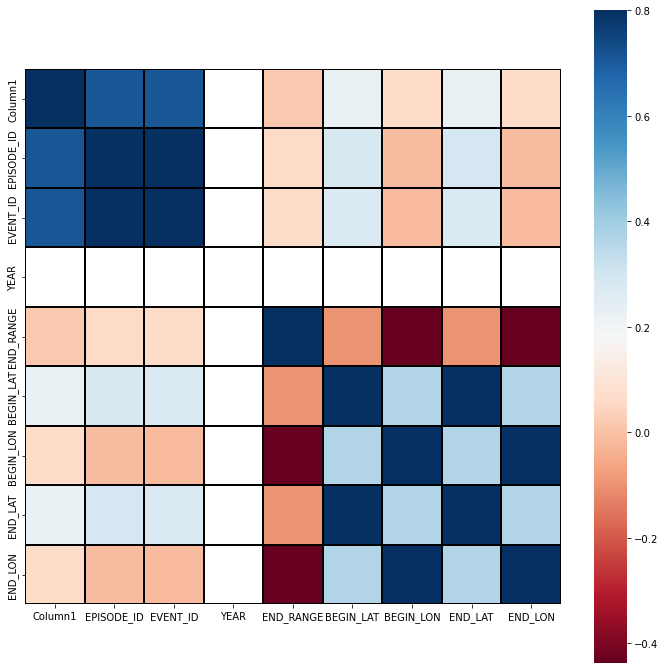

In [37]:
#heatmap of features
#positives are the dark shades and negatives are the lighter shades.

corr=df.corr(method='spearman')
plt.figure(figsize=(12,12))
sn.heatmap(corr, vmax=.8,linewidths=0.01, square=True, annot=False, cmap='RdBu', linecolor='black')